I.9.2 Схема Горнера
коэффициенты:  [    1   -18   144  -672  2016 -4032  5376 -4608  2304  -512]
разбитый отрезок: [1.92   1.9201 1.9202 ... 2.0798 2.0799 2.08  ]
количество операций:  16010


<IPython.core.display.Javascript object>


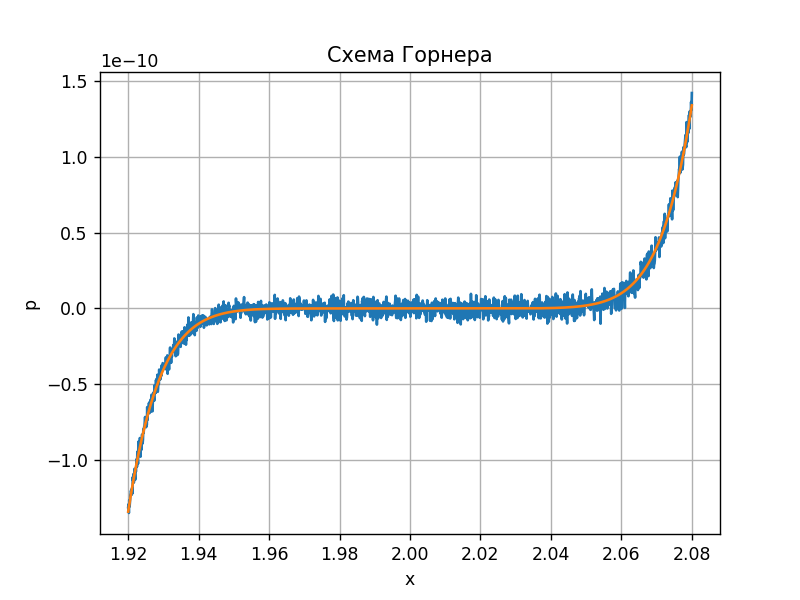

In [5]:
print ('I.9.2' , 'Схема Горнера')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

start = 1.92
finish = 2.08
degree = 9
n = np.arange(start,finish, 10**(-4))
a = np.array([1,-18,144,-672,2016,-4032,5376,-4608,2304,-512])
        
print ('коэффициенты: ', a)
print ('разбитый отрезок:', n) 
counter_of_operations = 0
pp = np.array([])
for i in n:
    p = 0
    for j in a:
        #print (i, j)
        p = p * i + j
        counter_of_operations += 1
    pp = np.append(pp, p)
print ('количество операций: ', counter_of_operations)
#print (pp)

x = np.arange(start,finish, 10**(-4))
y = np.array([])
y = (x -2)**9

fig, ax = plt.subplots()
ax.plot(n, pp)
ax.plot(x,y)
ax.set(xlabel='x', ylabel='p', title='Схема Горнера')
ax.grid()
plt.show()

In [3]:
print ('II.10.6а')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
a = 1
b = 10
c = 1
p = 1
n = 99
myA = np.zeros((n+1,n+1))
for j in range (0, n+1):
    for i in range (0, n+1):
        if i == j:
            myA[i][j] = b
        if i - 1 == j:
            myA[i][j] = a
        if i == j - 1:
            myA[i][j] = c
        if i == n:
            myA[i][j] = p
myB = np.arange(1, n+2, 1)



def SwapRows(A, B, row1, row2): # перемена местами двух строк системы
    A[row1], A[row2] = A[row2], A[row1]
    B[row1], B[row2] = B[row2], B[row1]

def DivideRow(A, B, row, divider): # деление строки системы на число
    A[row] = [a / divider for a in A[row]]
    B[row] /= divider


def CombineRows(A, B, row, source_row, weight): #сложение строки системы с другой строкой, умноженной на число
    A[row] = [(a + k * weight) for a, k in zip(A[row], A[source_row])]
    B[row] += B[source_row] * weight

def Gauss(A, B): # решение системы методом Гаусса (приведением к треугольному виду)
    column = 0
    while (column < len(B)):
        #print("Ищем максимальный по модулю элемент в {0}-м столбце:".format(column + 1))
        current_row = None
        for r in range(column, len(A)):
            if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
                 current_row = r
        if current_row is None:
            #print("решений нет")
            return None
        if current_row != column:
            #print("Переставляем строку с найденным элементом повыше:")
            SwapRows(A, B, current_row, column)
        #print("Нормализуем строку с найденным элементом:")
        DivideRow(A, B, column, A[column][column])
        #print("Обрабатываем нижележащие строки:")
        for r in range(column + 1, len(A)):
            CombineRows(A, B, r, column, -A[r][column])
        column += 1
    #print("Матрица приведена к треугольному виду, считаем решение")
    X = [0 for b in B]
    for i in range(len(B) - 1, -1, -1):
        X[i] = B[i] - sum(x * a for x, a in zip(X[(i + 1):], A[i][(i + 1):]))
    #print("Получили ответ:")
    #print("\n".join("X{0} =\t{1:10.2f}".format(i + 1, x) for i, x in enumerate(X)))
    return X


def seidel(A, b, eps):
    n = len(A)
    x = np.zeros(n) 
    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        converge = np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new
        #print (x)
    return x

def neviazki (A, B, result):
    nev = np.array([])
    for i in range (0, n + 1):
        lol= 0
        for j in range (0, n + 1):
            lol += A[i][j] * result[j]
        nev = np.append(nev,[B[i] - lol])
        print (np.around((B[i] - lol), decimals = 15))
    return nev
    
def norm(A): # 1 норма
    summmax = 0
    for j in range(0, n + 1):
        summ = 0
        for i in range(0,n + 1): 
            summ += np.abs(A[i][j])
        if summ > summmax:
            summax = summ
    return summax

    
print('Число обусловленности по первой норме:', norm(myA)*norm(np.linalg.inv(myA)))
print(myA)
result = Gauss(myA, myB)

print('Ответ по методу Гаусса:', np.around(result, decimals = 3))
print ('Невязки по методу Гаусса:', neviazki(myA, myB, result))

                                           
res_sei = seidel(myA, myB, 10**(-3))
print('Ответ по методу Зейделя:', np.around(res_sei, decimals = 3))
print ('Невязки по методу Зейделя:', np.around((neviazki(myA, myB, res_sei)), decimals = 15))                                      



II.10.6а
[[10.  1.  0. ...  0.  0.  0.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
Число обусловленности по первой норме: 2.449489742783178
[[10.  1.  0. ...  0.  0.  0.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
Ответ по методу Гаусса: [-0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00
 -1.0000e-03  9.0000e-03 -9.2000e-02  9.0800e-01  9.0800e-01  9.0800e-01
  9.0800e-01  9.0800e-01  9.0800e-01  9.0800e-01  9.0800e-01  9.0700e-01
  9.1800e-01  8.1600e-01  1.8160e+00  1.8160e+00  1.8160e+00  1.8160e+00
  1.8160e+00  1.8160e+00  1.8160e+00  1.8170e+00  1.8160e+00  1.8260e+00
  1.7250e+00  2.7250e+00  2.7250e+00  2.7250e+00  2.7250e+00  2.7250e+00
  2.7250e+00  2.7250e+00  2.7250e+00  2.7240e+00  2.7340e+00  2.6330e+00
  3.6330e+00  3

In [48]:
# насколько я помню собственные числа мы не учились находить именно вычматовскими методами
# на лекции было нахождение полной спектральной задачи вычислительной линейной алгебры
# но она была дана только для симметричной матрицы (метододом вращений)
sobst = np.linalg.eigh(myA)[0] 
print('найденные собственные числа:', sobst)
print('максимальное собственное число:',  format(max(sobst),'.2f'), '  и минимальное',  format(min(sobst),'.2f'))

найденные собственные числа: [-4.87438031  8.00098703  8.00394654  8.00887746  8.0157706   8.02462717
  8.0354255   8.04817401  8.06283368  8.07942506  8.09788697  8.11825699
  8.14044703  8.16451656  8.1903459   8.2180212   8.24738664  8.27855978
  8.31134415  8.34589339  8.38196601  8.4197563   8.45897351  8.49985704
  8.54206275  8.58587951  8.63090579  8.67748422  8.72515202  8.7743097
  8.8244295   8.87597384  8.92834641  8.98207545  9.03649265  9.09219582
  9.14844142  9.20590041  9.26375089  9.3227405   9.38196601  9.44225501
  9.50262023  9.56397231  9.62523737  9.68741209  9.74933353  9.8120872
  9.87441896  9.93750566 10.         10.06317253 10.12558104 10.18859188
 10.25066647 10.31326877 10.37476263 10.43671117 10.49737977 10.55843193
 10.61803399 10.67795067 10.73624911 10.79479572 10.85155858 10.90850593
 10.96350735 11.01863252 11.07165359 11.12474084 11.1755705  11.2264121
 11.27484798 11.323245   11.36909421 11.41485734 11.45793725 11.5008875
 11.54102649 11.58099589 1

In [39]:
myC = np.array([[5,-2],[-2,2]])
sobst = np.linalg.eigh(myC)[1] 
print('найденные собственные числа:', sobst)
#print('максимальное собственное число:',  format(max(sobst),'.2f'), '  и минимальное',  format(min(sobst),'.2f'))

найденные собственные числа: [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]


In [61]:
sobst = np.linalg.eigh(myA)[1][1]
print(myA.dot(sobst)-17.85573247*sobst)

[ 0.40793506 -0.13828933  0.12161852  0.22565146 -0.25907943 -0.36027163
  0.39245291  0.48924154 -0.51963558 -0.61053975  0.63862171  0.72226571
 -0.74753483 -0.82266974  0.84465732  0.91018058 -0.92845754 -0.98343016
  0.99761391  1.04127516 -1.05103583 -1.08281501  1.08788082  1.10740608
 -1.10756785 -1.11467184  1.10978647  1.1045087  -1.09450173 -1.07708768
  1.06195472  1.03285165 -1.01265876 -0.97250829  0.94739135  0.67908483
  0.84484979 -0.83189799 -0.74772506  0.73298836  0.63880926 -0.62273576
 -0.51981998  0.50288616  0.39263365 -0.37533607 -0.25925594  0.24210252
  0.12179019 -0.10529113  0.01759585 -0.03293716 -0.15670412  0.17040026
  0.29334096 -0.30492946 -0.4253517   0.43440364  0.55065463 -0.55678277
 -0.66727382  0.67014013  0.77337029 -0.77269261 -0.867271    0.86282881
  0.94749523 -0.9391343  -1.01277793  1.0004138   0.79473673  1.05454319
 -1.0879273  -1.07876916  1.10759841  1.08579483 -1.10980087 -1.07551858
  1.09450007  1.04811065 -1.06193754 -1.00400955  1

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def norm(A): # 2 норма
    summmax = 0
    for i in range(0,n + 1): 
        summ = 0
        summ = np.abs(A[i])
        if summ > summmax:
            summax = summ
    return summax

a = 1
b = 10
c = 1
p = 1
n = 99
myA = np.zeros((n+1,n+1))
for j in range (0, n+1):
    for i in range (0, n+1):
        if i == j:
            myA[i][j] = b
        if i - 1 == j:
            myA[i][j] = a
        if i == j - 1:
            myA[i][j] = c
        if i == n:
            myA[i][j] = p
myA = np.linalg.inv(myA)
myC = np.array([[5,-2],[-2,2]])
myC = np.linalg.inv(myC)
x_0 = np.zeros(n+1)
for i in range (0, n+1):
    if i%2 ==1:
        x_0[i] = -5
    else:
        x_0[i] = -1
x_0 = np.linalg.eigh(myA)[1][14]
#x_0 = np.append(x_0,[1,1])
x = myA.dot(x_0)
for i in range (0, 1000):
    x = x / norm(x)
    x = myA.dot(x)
    tmp = x
    x = myA.dot(x)
    lambd = x.dot(tmp)/tmp.dot(tmp)
    print (lambd)


1.0822680845398593
1.1112316739151298
1.1112486512762214
1.1112487776917634
1.1112487787682022
1.111248778777385
1.1112487787774639
1.1112487787774645
1.1112487787774643
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.11124877877

1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787

1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645
1.1112487787774645


III.5.11 Среднеквадратичная линейная аппроксимация
1.6956010652524969 0.8697525457063451


<IPython.core.display.Javascript object>


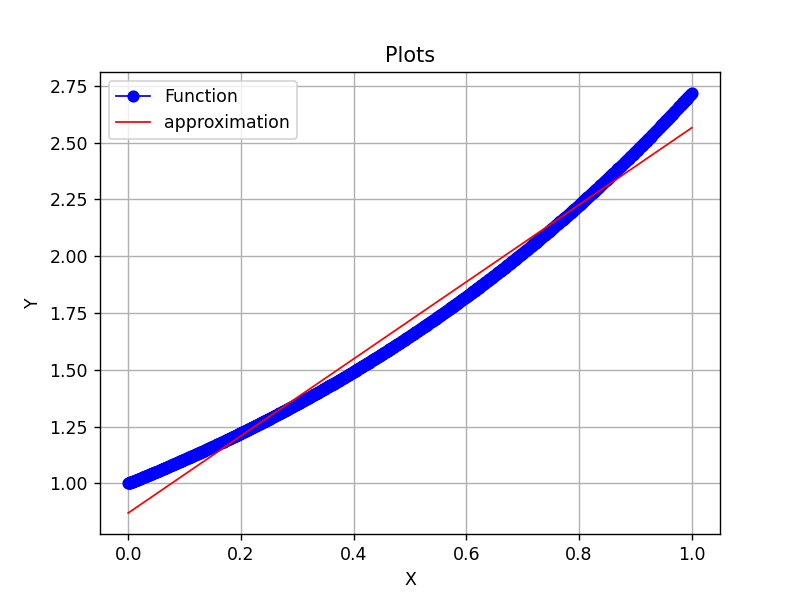

In [79]:
print ('III.5.11' , 'Среднеквадратичная линейная аппроксимация')
import numpy as np
import matplotlib.pyplot as plt
n = 1000
x = np.linspace(0,1,n)
y = np.zeros(n)
y = e**x

# формула выводится через МНК по минимальным невязкам
a = ((n+1)*np.sum(x*y) - np.sum(x)*np.sum(y))/((n+1)*np.sum(x**2) - np.sum(x)**2) 
b = (np.sum(y)*np.sum(x**2) - np.sum(x*y)*np.sum(x))/((n+1)*np.sum(x**2) - np.sum(x)**2)
print (a, b)

ya = np.zeros(n)     
ya = a*x+b
#p = np.polyfit(x, y, 2) 
#yp = np.polyval(p, x) 
 
plt.plot(x, y, 'bo-', lw = 1, label='Function')
plt.plot(x, ya, 'r-', lw = 1, label='approximation')
plt.legend(loc='best')
plt.title(u'Plots')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

III.5.12(б) Перепись населения США
[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
[ 92228496 106021537 123202624 132164569 151325798 179323175 203211926
 226545805 248709873 281421906]
[[5.00000e+00 4.50000e+02 2.85000e+04 2.02500e+06]
 [4.50000e+02 2.85000e+04 2.02500e+06 1.53330e+08]
 [2.85000e+04 2.02500e+06 1.53330e+08 1.20825e+10]
 [2.02500e+06 1.53330e+08 1.20825e+10 9.78405e+11]]
[1.74415571e+09 9.57840789e+10 6.58215853e+12 4.90855345e+14]
[-2.99739412e+07  1.05006663e+07 -1.83363475e+05  1.18251092e+03]
разница с реальностью в 308745538 человек: 60223323.705828905
относительная разница с реальностью в 308745538 человек: 0.1950581183972573


<IPython.core.display.Javascript object>


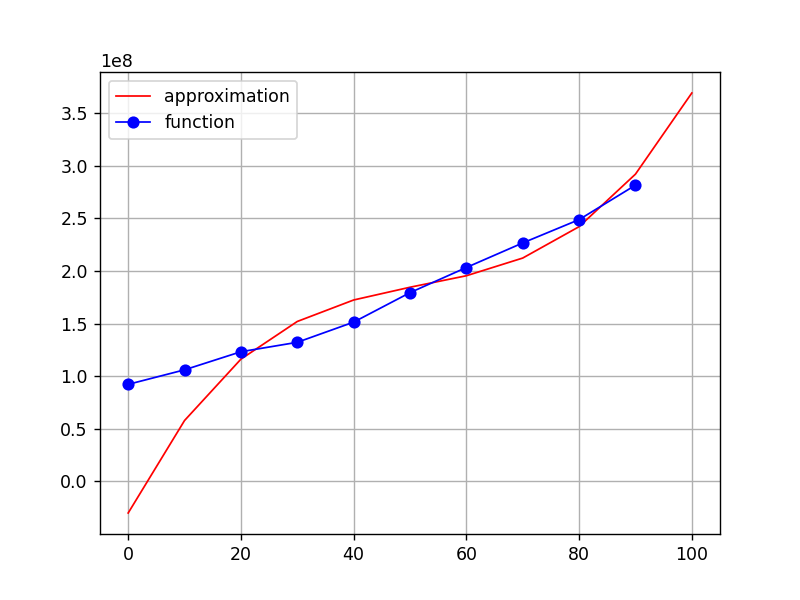

In [73]:
print ('III.5.12(б)' , 'Перепись населения США')
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(1910,2000,10)
x = x1 - 1910
print (x)
y = np.array([92228496, 106021537,123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906])
print (y)
n = 4 #2,3,4,5
# неплохо апппроксимирует в соответствии с реальностью многочлен 4 степени
A = np.zeros((n,n))
B = np.zeros(n)
for i in range (0, n):
    for j in range (0, n):
        A[i][j] = np.sum(x**(i+j))
A[0][0] = n+1
for i in range (0, n):
    B[i] = np.sum((x**i)*y)
    
print (A)
print (B)
#умение решать методами вычматов мы уже продемонстрировали, теперь доверимся numpy
res = np.linalg.solve(A, B)
print(res)

x2 = np.linspace(0,100,11)
ya = np.zeros(11)
for i in range(0,11):
    for j in range (0,n):
        ya[i] += res[j] * (x2[i]**j)
print ('разница с реальностью в 308745538 человек:', (ya[10] - 308745538))
print ('относительная разница с реальностью в 308745538 человек:', (ya[10] - 308745538)/308745538)

plt.plot(x2, ya, 'r-', lw = 1, label='approximation')
plt.plot(x, y, 'bo-', lw = 1, label='function')
plt.legend(loc='best')
plt.grid()
plt.show()